In [12]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import requests
import urllib.request, json
from pandas import json_normalize
%matplotlib inline

In [13]:
#fetching data
url = ('https://data.nepalcorona.info/api/v1/covid/timeline?format=json')
r_json = requests.get(url).json()
df = json_normalize(r_json)

In [14]:
df.head(10)

,date,totalCases,newCases,totalRecoveries,newRecoveries,totalDeaths,newDeaths
0,2020-01-30,0,0,0,0,0,0
1,2020-01-31,0,0,1,1,0,0
2,2020-02-01,0,0,1,0,0,0
3,2020-02-02,0,0,1,0,0,0
4,2020-02-03,0,0,1,0,0,0
5,2020-02-04,0,0,1,0,0,0
6,2020-02-05,0,0,1,0,0,0
7,2020-02-06,0,0,1,0,0,0
8,2020-02-07,0,0,1,0,0,0
9,2020-02-08,0,0,1,0,0,0


In [15]:
#formatting date
import datetime as dt
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.iloc[0]['date']

Timestamp('2020-01-30 00:00:00')

In [16]:
df['numDate']=df['date'].map(dt.datetime.toordinal) #for linear regression

In [17]:
df.head()

,date,totalCases,newCases,totalRecoveries,newRecoveries,totalDeaths,newDeaths,numDate
0,2020-01-30,0,0,0,0,0,0,737454
1,2020-01-31,0,0,1,1,0,0,737455
2,2020-02-01,0,0,1,0,0,0,737456
3,2020-02-02,0,0,1,0,0,0,737457
4,2020-02-03,0,0,1,0,0,0,737458


In [91]:
df2=df[(pd.DatetimeIndex(df['date']).month>4)]

In [134]:
from sklearn.linear_model import LinearRegression,BayesianRidge
from scipy import optimize
model=LinearRegression()
reg=BayesianRidge()
reg2=BayesianRidge()
model.fit(df2[['numDate']],df2['newCases'])
reg.fit(df2[['numDate']],df2['newCases'])
reg2.fit(df2[['numDate']],df2['newRecoveries'])

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

Text(0.3, 0.7, 'recovery prediction=16.0')

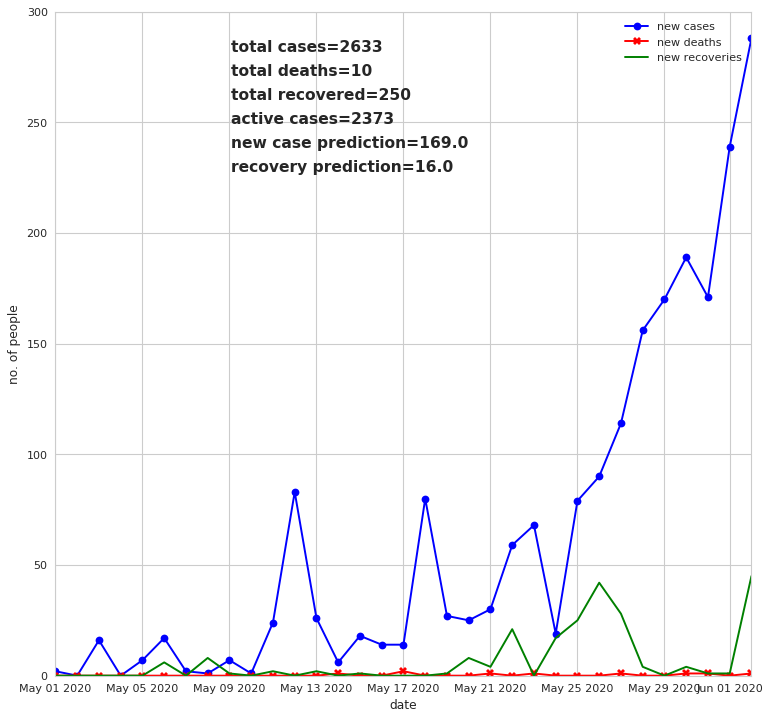

In [137]:
plt.style.use(['seaborn-notebook'])
plt.figure(figsize=(10,10))
plt.plot(df2['date'],df2['newCases'],marker='o',color='blue')
plt.plot(df2['date'],df2['newDeaths'],marker='X',color='red')
plt.plot(df2['date'],df2['newRecoveries'],marker='+',color='green')
#for linear regression
#plt.plot(df2['date'],reg.predict(df2[['numDate']]))
#plt.ylim(bottom=-0)
plt.xlabel('date')
plt.ylabel('no. of people')
plt.legend(['new cases','new deaths','new recoveries'])
plt.figtext(.3, .85, 'total cases={}'.format(df.iloc[-1]['totalCases']), fontsize=14,fontweight='bold')
plt.figtext(.3, .82, 'total deaths={}'.format(df.iloc[-1]['totalDeaths']), fontsize=14,fontweight='bold')
plt.figtext(.3, .79, 'total recovered={}'.format(df.iloc[-1]['totalRecoveries']), fontsize=14,fontweight='bold')
plt.figtext(.3, .76, 'active cases={}'.format(df.iloc[-1]['totalCases']-df.iloc[-1]['totalDeaths']-df.iloc[-1]['totalRecoveries']), fontsize=14,fontweight='bold')
plt.figtext(.3, .73, 'new case prediction={}'.format(round(reg.predict(df2[['numDate']]+1)[-1]),0), fontsize=14,fontweight='bold')
plt.figtext(.3, .70, 'recovery prediction={}'.format(round(reg2.predict(df2[['numDate']]+1)[-1]),0), fontsize=14,fontweight='bold')